# Задача классификации

## Описание задачи
### Оценка качества белого и красного вина
 Задача заключается в предсказании качества португальского вина "Vinho Verde", основываясь на наборе некоторых признаков, которые можно непосредственно измерить.

## Загрузка данных


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("C:/Users/troeg/ml/wine.csv")

Датасет содержит данные о 6497 различных винах (объектах), каждому из которых соответствует значение 15 признаков. Каждому признаку соответствует столбец. Убедимся, что загруженная таблица действительно имеет соответствующую размерность.

In [3]:
data.shape

(6497, 15)

Отобразим некоторые строки таблицы (первые 5 и последние 5 строк)

In [4]:
data

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,high_quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,0
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red,0
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red,0
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red,1
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white,1
6493,4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white,0
6494,4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white,1
6495,4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white,1


## Информация о наборе данных


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            6497 non-null   int64  
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
 13  color                 6497 non-null   object 
 14  high_quality          6497 non-null   int64  
dtypes: float64(11), int64

Видно, что столбцы таблицы, соответствуют следующим признакам:
- Unnamed - номер вина, нумерация производится с 0 и по возрастающей, причем для красных и белых вин ведётся независимо 
- fixed acidity - фиксированная кислотность
- volatile acidity - летучая кислотность
- citric acid - лимонная кислота
- residual sugar - концентрация остаточного сахара
- chlorides - концентрация хлоридов
- free sulfur dioxide - концентрация свободного диоксида серы
- total sulfur dioxide - общая концентрация диоксида серы
- density - плотность
- pH - мера определения кислотности водных растворов
- sulphates - концентрация сульфатов
- alcohol - концентрация алкоголя
- quality - качество по шкале от 0 до 10
- color - либо 'red', либо 'white'
- high_quality - итоговая оценка качества, 0 - вино некачественное, 1 - качественное. Целевой признак, состоящий из 2х классов.

Стоит отметить, что в начале таблицы рассполагается 1599 объектов, соответствующих красным винам, все последующие объекты - соответствуют белым. Зная этот факт, можно удалить признак 'Unnamed'. 

In [6]:
data.pop('Unnamed: 0')

0          0
1          1
2          2
3          3
4          4
        ... 
6492    4893
6493    4894
6494    4895
6495    4896
6496    4897
Name: Unnamed: 0, Length: 6497, dtype: int64

In [7]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,high_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white,1


## Проверка числовых признаков на наличие выбросов

Чтобы избавиться от выбросов, будем рассматривать числовые признаки, соответствующие значениям характеристик вина, которые могли быть неправильно измеряны приборами. Построим несколько диаграмм рассеивания.

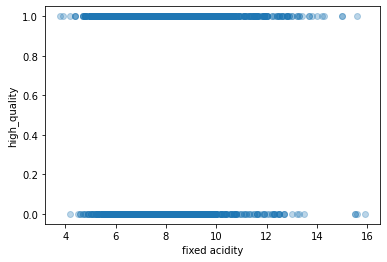

In [8]:
plt.scatter(data['fixed acidity'], data['high_quality'], alpha=0.3)
plt.xlabel('fixed acidity')
plt.ylabel('high_quality')
pass

Видно, что в правой части диаграммы рассеивания 'high_quality'-'fixed acidity' есть несколько точек, соответствующих объектам выборки со значениями фиксированной кислотности, которые превышают значение основной массы. Найдем квантили признака 'fixed acidity'.

In [9]:
data['fixed acidity'].quantile([0., 0.005,.01,.05,.1,.5,.9,.95,.99,.995, 1.])

0.000     3.800
0.005     4.948
0.010     5.100
0.050     5.700
0.100     6.000
0.500     7.000
0.900     8.800
0.950     9.800
0.990    12.000
0.995    12.700
1.000    15.900
Name: fixed acidity, dtype: float64

Видно, что  99%  всех значений признака 'fixed acidity' находится в диапазоне от  4.948  до  12.700 (это значения квантилей, соответствующих уровням  0.005  и  0.995  соответственно). Значит все объекты со значением признака, выходящнго из указанного диапазона необходимо удалить.

In [10]:
rows_before = data.shape
rows_to_drop = data[
    (data['fixed acidity'] < data['fixed acidity'].quantile(0.005)) | (data['fixed acidity'] > data['fixed acidity'].quantile(0.995))].index
data = data.drop(rows_to_drop)
rows_after = data.shape
res = rows_before[0] - rows_after[0]

Проделаем анналогичные действия поиска и устранения выбросов, относящихся к остальным числовым признакам.

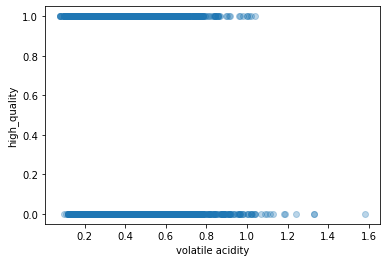

In [11]:
plt.scatter(data['volatile acidity'], data['high_quality'], alpha=0.3)
plt.xlabel('volatile acidity')
plt.ylabel('high_quality')
pass

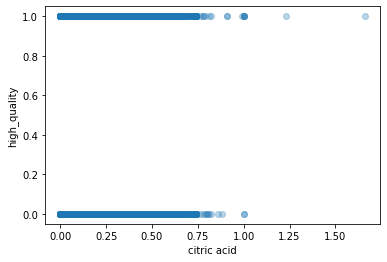

In [12]:
plt.scatter(data['citric acid'], data['high_quality'], alpha=0.3)
plt.xlabel('citric acid')
plt.ylabel('high_quality')
pass

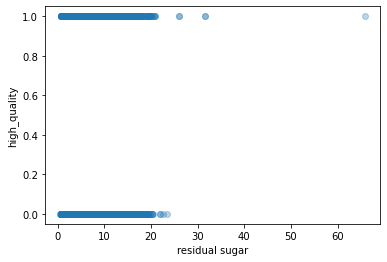

In [13]:
plt.scatter(data['residual sugar'], data['high_quality'], alpha=0.3)
plt.xlabel('residual sugar')
plt.ylabel('high_quality')
pass

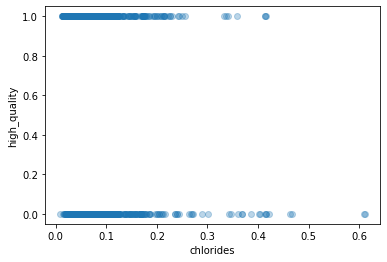

In [14]:
plt.scatter(data['chlorides'], data['high_quality'], alpha=0.3)
plt.xlabel('chlorides')
plt.ylabel('high_quality')
pass

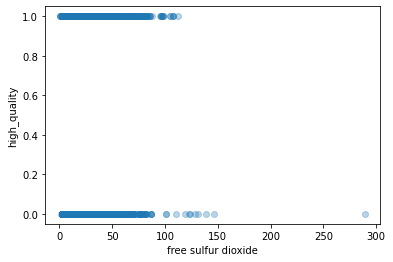

In [15]:
plt.scatter(data['free sulfur dioxide'], data['high_quality'], alpha=0.3)
plt.xlabel('free sulfur dioxide')
plt.ylabel('high_quality')
pass

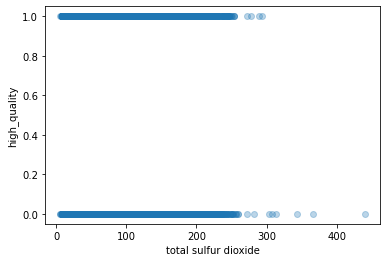

In [16]:
plt.scatter(data['total sulfur dioxide'], data['high_quality'], alpha=0.3)
plt.xlabel('total sulfur dioxide')
plt.ylabel('high_quality')
pass

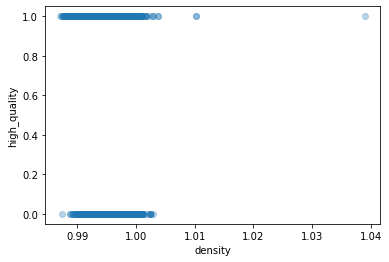

In [17]:
plt.scatter(data['density'], data['high_quality'], alpha=0.3)
plt.xlabel('density')
plt.ylabel('high_quality')
pass

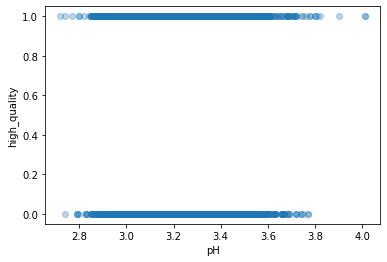

In [18]:
plt.scatter(data['pH'], data['high_quality'], alpha=0.3)
plt.xlabel('pH')
plt.ylabel('high_quality')
pass

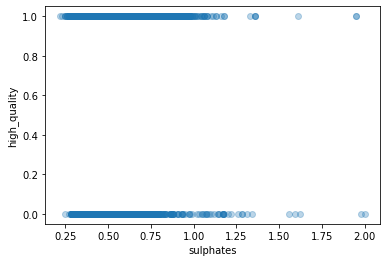

In [19]:
plt.scatter(data['sulphates'], data['high_quality'], alpha=0.3)
plt.xlabel('sulphates')
plt.ylabel('high_quality')
pass

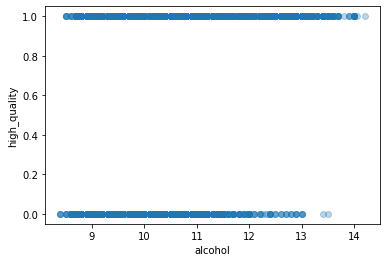

In [20]:
plt.scatter(data['alcohol'], data['high_quality'], alpha=0.3)
plt.xlabel('alcohol')
plt.ylabel('high_quality')
pass

Видно, что во всех правых частях диаграмм рассеивания содержатся точки, соответствующие объектам, которые являются выбросами, где значение признака сильно привышает значения большинства объектов. Значит все объекты со значением признака, выходящнго из указанного диапазона необходимо удалить.

In [21]:
data['volatile acidity'].quantile([0., 0.005,.01,.05,.1,.5,.9,.95,.99,.995, 1.])

0.000    0.080
0.005    0.115
0.010    0.120
0.050    0.160
0.100    0.180
0.500    0.290
0.900    0.590
0.950    0.670
0.990    0.880
0.995    0.965
1.000    1.580
Name: volatile acidity, dtype: float64

99% всех значений признака 'volatile acidity' находится в диапазоне от 0.115 до 0.965 (это значения квантилей, соответствующих уровням 0.005 и 0.995 соответственно). 

In [22]:
data['citric acid'].quantile([0., 0.005,.01,.05,.1,.5,.9,.95,.99,.995, 1.])

0.000    0.00
0.005    0.00
0.010    0.00
0.050    0.05
0.100    0.14
0.500    0.31
0.900    0.49
0.950    0.56
0.990    0.74
0.995    0.74
1.000    1.66
Name: citric acid, dtype: float64

99% всех значений признака 'citric acid' находится в диапазоне от 0.00 до 0.74 (это значения квантилей, соответствующих уровням 0.005 и 0.995 соответственно). 

In [23]:
data['residual sugar'].quantile([0., 0.005,.01,.05,.1,.5,.9,.95,.99,.995, 1.])

0.000     0.6
0.005     0.8
0.010     0.9
0.050     1.2
0.100     1.3
0.500     3.0
0.900    13.0
0.950    15.1
0.990    18.2
0.995    19.4
1.000    65.8
Name: residual sugar, dtype: float64

99% всех значений признака 'residual sugar' находится в диапазоне от 0.8 до 19.4 (это значения квантилей, соответствующих уровням 0.005 и 0.995 соответственно). 

In [24]:
data['chlorides'].quantile([0., 0.005,.01,.05,.1,.5,.9,.95,.99,.995, 1.])

0.000    0.00900
0.005    0.01900
0.010    0.02100
0.050    0.02800
0.100    0.03100
0.500    0.04700
0.900    0.08600
0.950    0.10200
0.990    0.18872
0.995    0.24268
1.000    0.61100
Name: chlorides, dtype: float64

99% всех значений признака 'chlorides' находится в диапазоне от 0.019 до 0.24268 (это значения квантилей, соответствующих уровням 0.005 и 0.995 соответственно). 

In [25]:
data['free sulfur dioxide'].quantile([0., 0.005,.01,.05,.1,.5,.9,.95,.99,.995, 1.])

0.000      1.00
0.005      3.00
0.010      4.00
0.050      6.00
0.100      9.00
0.500     29.00
0.900     54.00
0.950     61.00
0.990     76.68
0.995     85.00
1.000    289.00
Name: free sulfur dioxide, dtype: float64

99% всех значений признака 'free sulfur dioxide' находится в диапазоне от 3.0 до 85.0 (это значения квантилей, соответствующих уровням 0.005 и 0.995 соответственно). 

In [26]:
data['total sulfur dioxide'].quantile([0., 0.005,.01,.05,.1,.5,.9,.95,.99,.995, 1.])

0.000      6.0
0.005      9.0
0.010     11.0
0.050     19.0
0.100     30.0
0.500    118.0
0.900    188.0
0.950    206.0
0.990    238.0
0.995    247.0
1.000    440.0
Name: total sulfur dioxide, dtype: float64

99% всех значений признака 'total sulfur dioxide' находится в диапазоне от 9.0 до 247.0 (это значения квантилей, соответствующих уровням 0.005 и 0.995 соответственно). 

In [27]:
data['density'].quantile([0., 0.005,.01,.05,.1,.5,.9,.95,.99,.995, 1.])

0.000    0.987110
0.005    0.988653
0.010    0.988926
0.050    0.989930
0.100    0.990700
0.500    0.994890
0.900    0.998400
0.950    0.999220
0.990    1.000400
0.995    1.001000
1.000    1.038980
Name: density, dtype: float64

99% всех значений признака 'density' находится в диапазоне от 0.988653 до 1.001 (это значения квантилей, соответствующих уровням 0.005 и 0.995 соответственно). 

In [28]:
data['pH'].quantile([0., 0.005,.01,.05,.1,.5,.9,.95,.99,.995, 1.])

0.000    2.72
0.005    2.86
0.010    2.89
0.050    2.97
0.100    3.02
0.500    3.21
0.900    3.42
0.950    3.50
0.990    3.63
0.995    3.69
1.000    4.01
Name: pH, dtype: float64

99% всех значений признака 'pH' находится в диапазоне от 2.86 до 3.69 (это значения квантилей, соответствующих уровням 0.005 и 0.995 соответственно). 

In [29]:
data['sulphates'].quantile([0., 0.005,.01,.05,.1,.5,.9,.95,.99,.995, 1.])

0.000    0.2200
0.005    0.2800
0.010    0.3000
0.050    0.3500
0.100    0.3800
0.500    0.5100
0.900    0.7200
0.950    0.7900
0.990    0.9900
0.995    1.1284
1.000    2.0000
Name: sulphates, dtype: float64

99% всех значений признака 'sulphates' находится в диапазоне от 0.28 до 1.1284 (это значения квантилей, соответствующих уровням 0.005 и 0.995 соответственно). 

In [30]:
data['alcohol'].quantile([0., 0.005,.01,.05,.1,.5,.9,.95,.99,.995, 1.])

0.000     8.4
0.005     8.6
0.010     8.7
0.050     9.0
0.100     9.1
0.500    10.3
0.900    12.3
0.950    12.7
0.990    13.4
0.995    13.6
1.000    14.2
Name: alcohol, dtype: float64

99% всех значений признака 'alcohol' находится в диапазоне от 8.6 до 13.6 (это значения квантилей, соответствующих уровням 0.005 и 0.995 соответственно). 

Удалим все строки, соответствующие выбросам.

In [31]:
rows_before = data.shape
rows_to_drop = data[
    (data['volatile acidity']  < data['volatile acidity' ].quantile(0.005)) | (data['volatile acidity']  > data['volatile acidity' ].quantile(0.995)) |
    (data['citric acid'] < data['citric acid'].quantile(0.005)) | (data['citric acid'] > data['citric acid'].quantile(0.995)) |
    (data['residual sugar'] < data['residual sugar'].quantile(0.005)) | (data['residual sugar'] > data['residual sugar'].quantile(0.995)) |
    (data['chlorides'] < data['chlorides'].quantile(0.005)) | (data['chlorides'] > data['chlorides'].quantile(0.995)) |
    (data['free sulfur dioxide'] < data['free sulfur dioxide'].quantile(0.005)) | (data['free sulfur dioxide'] > data['free sulfur dioxide'].quantile(0.995)) |
    (data['total sulfur dioxide'] < data['total sulfur dioxide'].quantile(0.005)) | (data['total sulfur dioxide'] > data['total sulfur dioxide'].quantile(0.995)) |
    (data['density'] < data['density'].quantile(0.005)) | (data['density'] > data['density'].quantile(0.995)) |
    (data['pH'] < data['pH'].quantile(0.005)) | (data['pH'] > data['pH'].quantile(0.995)) |
    (data['sulphates'] < data['sulphates'].quantile(0.005)) | (data['sulphates'] > data['sulphates'].quantile(0.995)) |
    (data['alcohol'] < data['alcohol'].quantile(0.005)) | (data['alcohol'] > data['alcohol'].quantile(0.995)) |
    (data['quality'] < data['quality'].quantile(0.005)) | (data['density'] > data['density'].quantile(0.995)) |
    (data['density'] < data['density'].quantile(0.005)) | (data['density'] > data['density'].quantile(0.995))].index
data = data.drop(rows_to_drop)

rows_after = data.shape
res = res + rows_before[0] - rows_after[0]
print('Количество удалённых объектов (строк): ', res)

Количество удалённых объектов (строк):  515


## Визуализация данных и основные статистические характеристики

Описательная статистика данных

In [32]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,high_quality
count,5982.000000,5982.000000,5982.000000,5982.000000,5982.000000,5982.000000,5982.000000,5982.000000,5982.000000,5982.000000,5982.000000,5982.000000,5982.000000
mean,7.191148,0.335649,0.315458,5.412538,0.054339,30.367937,116.116934,0.994670,3.218980,0.527156,10.466725,5.829321,0.635741
std,1.182138,0.155746,0.137757,4.580418,0.025683,16.517017,55.041061,0.002826,0.152737,0.132736,1.151248,0.847386,0.481262
min,5.000000,0.115000,0.000000,0.800000,0.019000,3.000000,9.000000,0.988670,2.860000,0.280000,8.600000,4.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,80.000000,0.992393,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,119.000000,0.994900,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.600000,0.400000,0.390000,8.100000,0.064000,41.000000,156.000000,0.996900,3.320000,0.600000,11.300000,6.000000,1.000000
max,12.700000,0.965000,0.740000,19.400000,0.241000,85.000000,247.000000,1.001000,3.690000,1.120000,13.600000,9.000000,1.000000


- count - количество значений для каждого признака
- mean - среднее значение
- std - стандартное отклонение
- min - минимальное значение
- 25% - первый квартиль
- 50% - медиана
- 75% - третий квартиль
- max - максимальное значение

В датасете содержится номинальный признак 'color'. Узнаем, сколько раз он принимает каждое из своих возможных значений.

In [33]:
data['color'] = data['color'].astype('category')
data['color'].value_counts() 

white    4553
red      1429
Name: color, dtype: int64

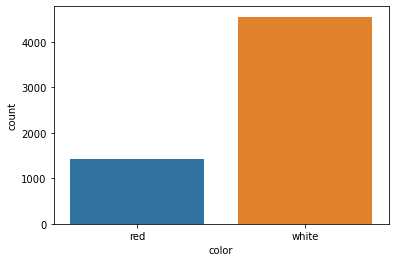

In [34]:
sns.countplot(x='color', data=data)
pass

Также полезно визуализировать соотношение классов.

In [35]:
data['high_quality'].value_counts() 

1    3803
0    2179
Name: high_quality, dtype: int64

In [36]:
inf = data['high_quality'].value_counts()
size = data.shape
print('Класс "качественные вина"',inf[1] * 100 / size[0] , '%')
print('Класс "некачественные вина"',inf[0] * 100 / size[0] , '%')

Класс "качественные вина" 63.57405549983283 %
Класс "некачественные вина" 36.42594450016717 %


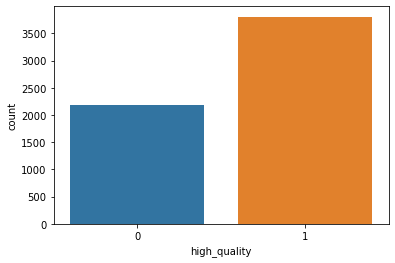

In [37]:
sns.countplot(x='high_quality', data=data)
pass

Матрица корреляции:

In [38]:
corr_matrix = data.corr()
corr_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,high_quality
fixed acidity,1.000000,0.230642,0.291711,-0.135512,0.342847,-0.287958,-0.336167,0.437593,-0.210263,0.298460,-0.067313,-0.066978,-0.065415
volatile acidity,0.230642,1.000000,-0.416448,-0.214656,0.447679,-0.366652,-0.430995,0.281349,0.277885,0.225330,-0.052219,-0.257283,-0.266293
citric acid,0.291711,-0.416448,1.000000,0.139406,-0.068775,0.165612,0.220949,0.054520,-0.313258,0.026770,0.013580,0.094664,0.079776
residual sugar,-0.135512,-0.214656,0.139406,1.000000,-0.158693,0.442292,0.507585,0.537770,-0.275650,-0.192490,-0.373406,-0.034939,-0.035556
chlorides,0.342847,0.447679,-0.068775,-0.158693,1.000000,-0.230688,-0.334605,0.435942,0.135843,0.298693,-0.284816,-0.220808,-0.198674
free sulfur dioxide,-0.287958,-0.366652,0.165612,0.442292,-0.230688,1.000000,0.725992,0.045244,-0.169330,-0.192407,-0.187563,0.072984,0.058594
total sulfur dioxide,-0.336167,-0.430995,0.220949,0.507585,-0.334605,0.725992,1.000000,0.030427,-0.261319,-0.297733,-0.271501,-0.039442,-0.044462
density,0.437593,0.281349,0.054520,0.537770,0.435942,0.045244,0.030427,1.000000,0.049386,0.255918,-0.706994,-0.311743,-0.278895
pH,-0.210263,0.277885,-0.313258,-0.275650,0.135843,-0.169330,-0.261319,0.049386,1.000000,0.256497,0.094865,0.012310,0.008389
sulphates,0.298460,0.225330,0.026770,-0.192490,0.298693,-0.192407,-0.297733,0.255918,0.256497,1.000000,0.026635,0.055411,0.055471


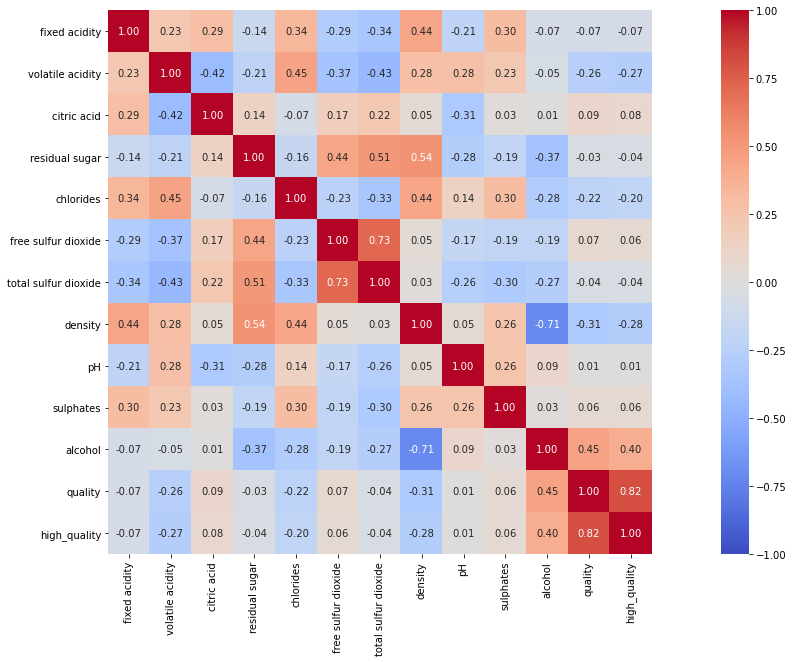

In [39]:
plt.figure(figsize=(25, 10))
sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')
pass

In [40]:
corr_matrix > 0.5

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,high_quality
fixed acidity,True,False,False,False,False,False,False,False,False,False,False,False,False
volatile acidity,False,True,False,False,False,False,False,False,False,False,False,False,False
citric acid,False,False,True,False,False,False,False,False,False,False,False,False,False
residual sugar,False,False,False,True,False,False,True,True,False,False,False,False,False
chlorides,False,False,False,False,True,False,False,False,False,False,False,False,False
free sulfur dioxide,False,False,False,False,False,True,True,False,False,False,False,False,False
total sulfur dioxide,False,False,False,True,False,True,True,False,False,False,False,False,False
density,False,False,False,True,False,False,False,True,False,False,False,False,False
pH,False,False,False,False,False,False,False,False,True,False,False,False,False
sulphates,False,False,False,False,False,False,False,False,False,True,False,False,False


Признаки с сильной корреляцией практически отсутствуют.  
Рассмотрим пары наиболее связанных признаков:  

'residual sugar' и 'density' со степенью корреляции, равной 0.552517. Значит, что остаточный сахар и плотность вина имеют прямую линейную зависимость.  

'free sulfur dioxide' и 'total sulfur dioxide' со степенью корреляции, равной 0.720934. Это очевидно, так как концентрация свободного диоксида серы напрямую влияет на общую концентрацию диоксида серы.

'high quality' и 'quality' со степенью корреляции, равной 0.814484. Логично, что чем выше оценка вина по десятибальной шкале, тем выше вероятность его принадлежности классу качественного вина. 

Кроме того целевой признак 'high quality' имеет значительную корреляцию с признаками 'volatile acidity' (летучая кислотность), 'density' (плотность), 'alcohol' (концентрация алкоголя), с остальными признаками корреляция слабая.

Выведем несколько диаграмм рассеивания признаков с наиболее сильной корреляцией:

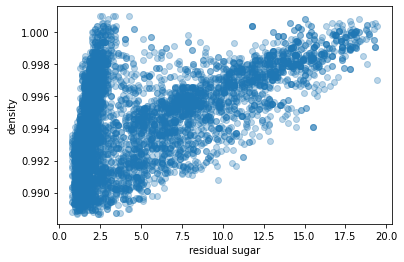

In [41]:
plt.scatter(data['residual sugar'], data['density'], alpha=0.3)
plt.xlabel('residual sugar')
plt.ylabel('density')
pass

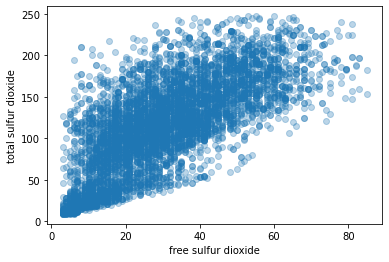

In [42]:
plt.scatter(data['free sulfur dioxide'], data['total sulfur dioxide'], alpha=0.3)
plt.xlabel('free sulfur dioxide')
plt.ylabel('total sulfur dioxide')
pass

## Обработка категориальных признаков

Категориальный признак 'color' можно считать бинарным, а значит заменим его значения на '0' и '1'. Так как в наборе данных нет небинарных категориальных признаков, но нормализацию проводить не нужно.

In [43]:
data['color'] = pd.factorize(data['color'])[0]
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,high_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1,1


## Обучающая и тестовая выборки

In [44]:
X = data.drop(['high_quality'], axis = 1)
Y = data['high_quality']

Разделим данные  на тестовую и обучающую выборки в соотношении 75% к 25% соответственно.

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 100)

N_train = X_train.shape[0]
N_test = X_test.shape[0]
print( 'Объем обучающей выборки:', N_train, '\nОбъем тестовой выборки:', N_test)

Объем обучающей выборки: 4486 
Объем тестовой выборки: 1496


## Запуск классификатора ближайших соседей

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from prettytable import PrettyTable 

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [47]:
errors = []
for k in [2, 3, 4, 5, 8, 10, 15, 20, 25, 30, 35, 40]:
    model = KNeighborsClassifier(n_neighbors = k, p = 2)
    model.fit(X_train, Y_train)
    errors.append((k, float(1 - model.score(X_train, Y_train)), float(1 - model.score(X_test, Y_test))))

In [48]:
table_header = ['Количество соседей','Ошибка на обучающей выборке','Ошибка на тестовой выборке']
table = PrettyTable(table_header)

for x in errors:
    table.add_row(x)

print(table)

+--------------------+-----------------------------+----------------------------+
| Количество соседей | Ошибка на обучающей выборке | Ошибка на тестовой выборке |
+--------------------+-----------------------------+----------------------------+
|         2          |     0.09273294694605438     |    0.27874331550802134     |
|         3          |     0.10900579580918413     |     0.2586898395721925     |
|         4          |     0.14422648238965674     |     0.2954545454545454     |
|         5          |     0.15871600534997776     |     0.2727272727272727     |
|         8          |     0.19460543914400352     |    0.28275401069518713     |
|         10         |      0.2055283102987071     |     0.2820855614973262     |
|         15         |     0.23027195720017835     |    0.29278074866310155     |
|         20         |     0.24141774409273298     |    0.30681818181818177     |
|         25         |      0.2614801604993312     |    0.30548128342245995     |
|         30    

Запустив классификатор ближайших соседей видно, что при увеличении количества соседей, ошибка на обоих выборках увеличивается. При этом ошибка достаточно велика. 

## Общие выводы

В данной работе был проведён анализ набора данных объёма 6497 объектов, которых содержит 15 признаков, соответствующих различным характеристикам вина. На основе значений признаков необходимо предсказать принадлежность вина классу качественных или некачественных (задача бинарной классификации).

В ходе работы было выполнено:
1. Загрузка данных
2. Обнаружение выбросов и избавление от них
3. Визуализация данных и вычисление статистических характеристик
4. Обработка категориальных признаков с помощью метода бинаризации
5. Разбиение данных на обучающую и тестовую выборки
6. Запуск классификатора ближайших соседей с разным количеством соседей
7. Вычисление ошибки на обучающей и тестовой выборках

В результате исследования надора данных и запуска классификатора можно выделить следующие выводы:

При запуске классификатора ближайших соседей наименьшее значение ошибки достигается при двух соседях. Значения ошибки равны ~9.27% и ~27.87% для обучающей и тестовой выборки соответственно. Видно, что значения ошибки достаточно большие. Возможно, на это влияет недостаточно большой объём набора данных, несбалансированность классов ( ~64/36), преимущественно слабая корреляция признаков. 